<a href="https://colab.research.google.com/github/digambasingh/machine-learning-class-projects/blob/main/LAb5_Gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
data = pd.read_csv("/content/gender_classification_v7.csv")

In [ ]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
5,1,13.0,6.8,1,1,1,1,0
6,1,15.3,6.2,1,1,1,0,0
7,0,13.0,5.2,0,0,0,0,1
8,1,11.9,5.4,1,0,1,1,1
9,1,12.1,5.4,0,0,0,0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,-0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,-0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,-0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,-0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,-0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,-0.754850
gender,0.010767,-0.334125,-0.277190,-0.758502,-0.744147,-0.743319,-0.754850,1.000000


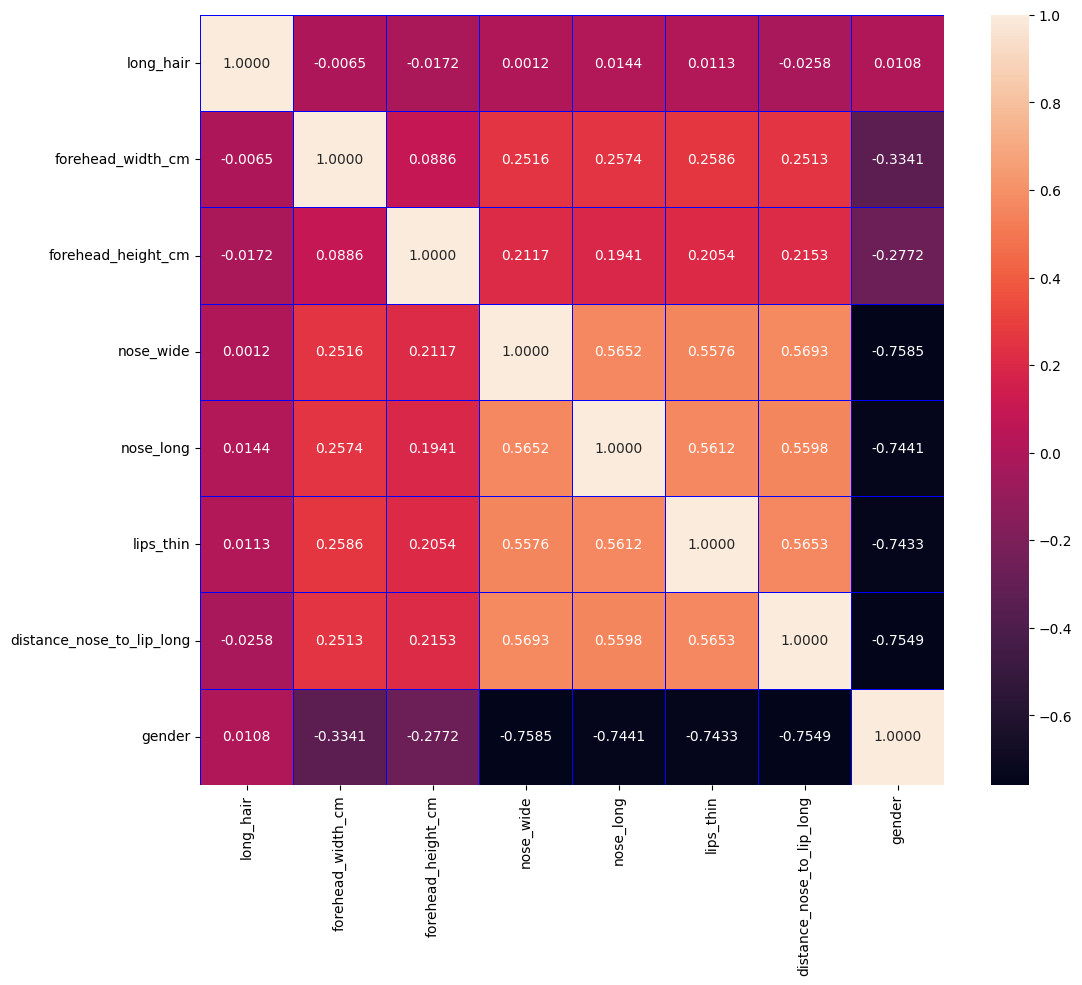

In [ ]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

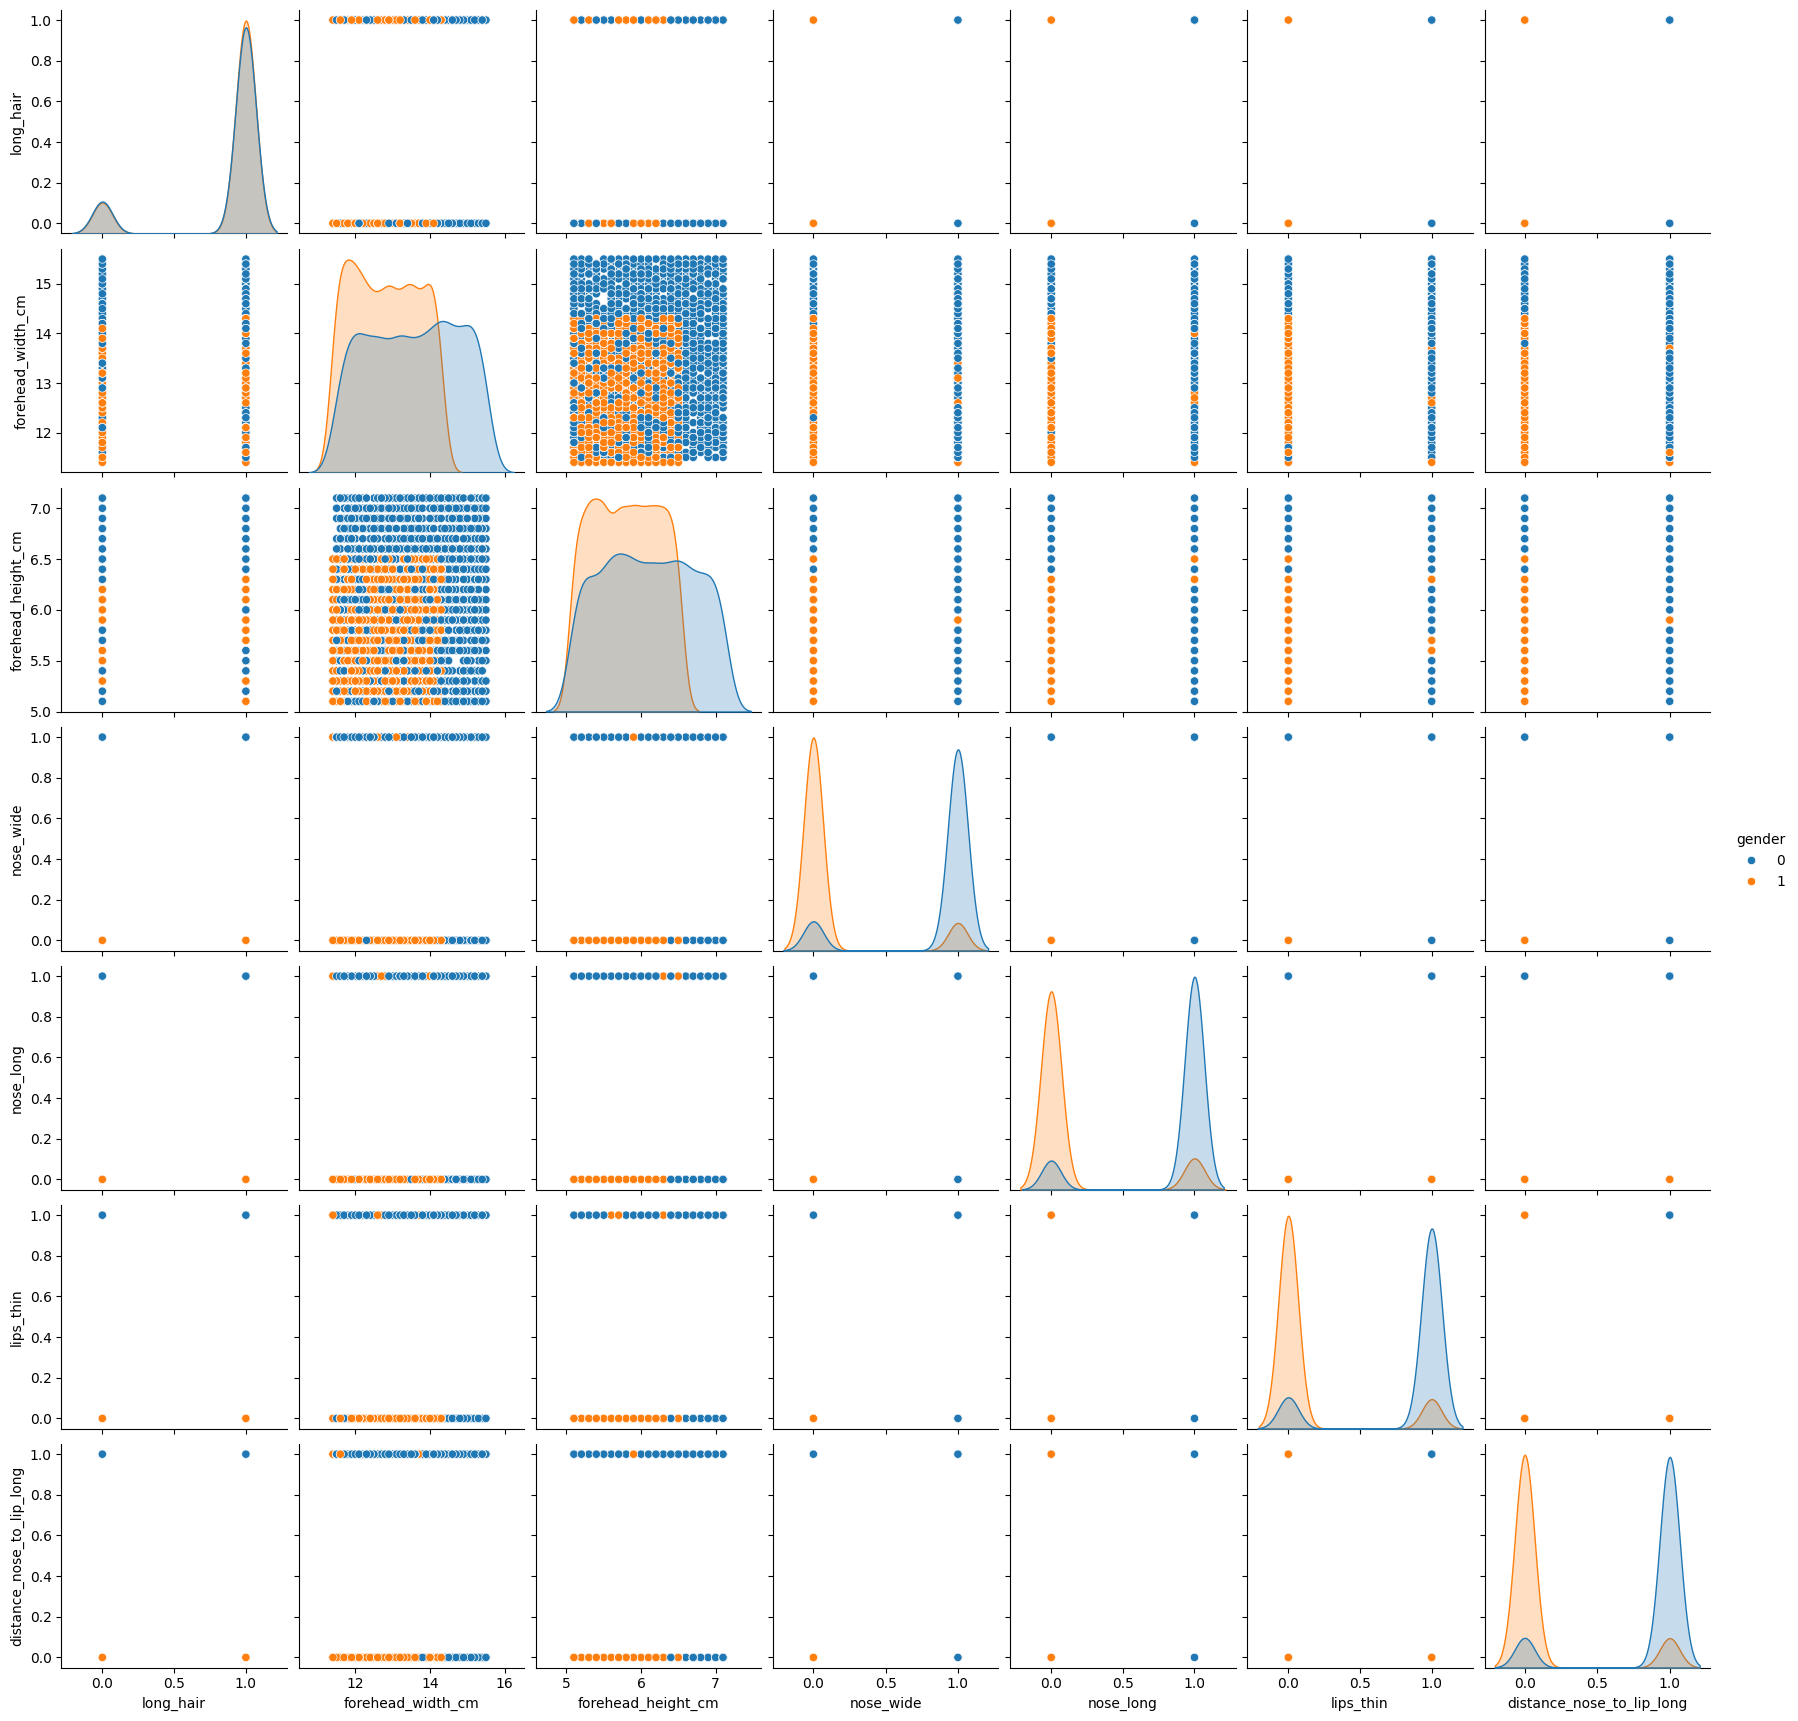

In [ ]:
sns.pairplot(data, hue = "gender")

In [ ]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

,count
gender,
1,2501
0,2500


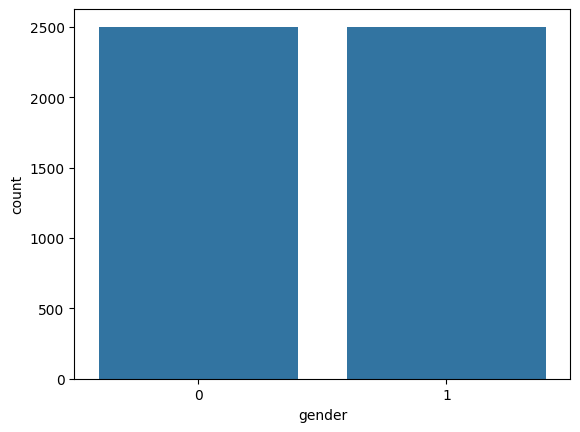

In [ ]:
sns.countplot(x = "gender", data = data)
data.loc[:,"gender"].value_counts()

In [ ]:
x_data = data.drop(["gender"],axis = 1)

In [ ]:
y_data = data.gender.values

In [ ]:
x_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [ ]:
x_data.shape

(5001, 7)

In [ ]:
y_data

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
y_data.shape

(5001,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)


GaussianNB()

In [ ]:
print("print Train for accuracy of NBC algo: ", gnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", gnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9714285714285714
print Test for accuracy of NBC algo:  0.9673550966022652


In [ ]:
from sklearn.metrics import precision_score, recall_score

y_pred = gnb.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9665327978580991
Recall: 0.967828418230563


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = mnb.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9927849927849928
Recall: 0.9222520107238605


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
print("print Train for accuracy of NBC algo: ", bnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", bnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9585714285714285
print Test for accuracy of NBC algo:  0.9593604263824117


In [ ]:
y_pred = mnb.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9927849927849928
Recall: 0.9222520107238605


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
print("print Train for accuracy of NBC algo: ", bnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", bnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9585714285714285
print Test for accuracy of NBC algo:  0.9593604263824117


In [ ]:
y_pred = bnb.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9659863945578231
Recall: 0.9517426273458445


In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()

cnb.fit(x_train, y_train)

ComplementNB()

In [ ]:
y_pred = cnb.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9927849927849928
Recall: 0.9222520107238605
